In [35]:
from time import time

from matplotlib.pyplot import figure, gca, imshow, plot, show, subplot
from matplotlib.lines import Line2D
import numpy as np
from PIL import Image
from skimage.feature import canny

DT'f# 显示图
loat32'

def imsim2=None :e=[4,4]) 
 is not None:   if im2 
        figure(figs
        subplot(1,2,1)ot(1, 2, 1)
        imshow(np.round(im1 * 255).astype('uint8'), cmap='gray')
        subplot(1, 2, 2)
        imshow(np.round(im2 * 255).astype('uigsize=[4,4]) gr
        figure(figsize=[4,4])ay')
    else:
        imshow(np.round(im1 * 255).astype('uint8'), cmap='gray')  
    show()
    
def plot_line(theta, pho, image_shape):
    # theta = 0
    if np.abs(np.sin(theta)) < np.finfo('float32').eps:
        x0 = pho
        x_min = x0
        y_min = 0
        x_max = x0
        y_max = image_shape[0]
    else:
        k = -np.cos(theta) / np.sin(theta)
        b = pho / np.sin(theta)
        x_min = 0
        y_min = b
        x_max = image_shape[1]
        y_max = x_max * k + b

    gca().add_line(Line2D([x_min, x_max], [y_min, y_max], color='red'))

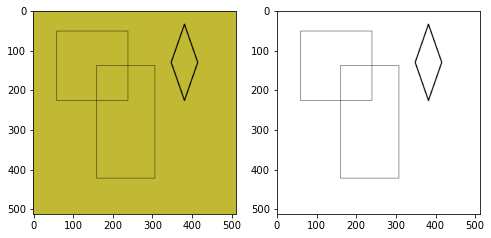

In [36]:
test1 = 'test1.png'
raw_image = np.array(Image.open(test1)).astype(DTYPE)
gray_image = np.sum(raw_image * np.array([0.299, 0.587, 0.114], dtype=DTYPE), -1)

imshow2(raw_image, gray_image)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


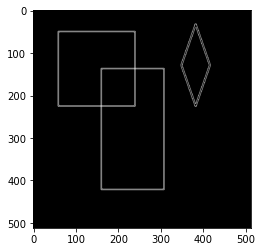

In [37]:

edges_mask = canny(gray_image, sigma=1)
print(edges_mask)
imshow2(edges_mask)

In [38]:

y, x = np.nonzero(edges_mask)
n_feature_points = len(x)
print(f'We got {n_feature_points} feature points, like:\n   x\ty'
      f'\n{np.stack([x, y], -1)[:10, :]}')

We got 3929 feature points, like:
   x	y
[[380  32]
 [381  32]
 [382  32]
 [383  32]
 [380  33]
 [383  33]
 [379  34]
 [380  34]
 [383  34]
 [384  34]]


In [39]:

n_thetas = 720
x = x[:, None]  # [N,] -> [N, 1]
y = y[:, None]  # [N,] -> [N, 1]
thetas = np.linspace(-np.pi/2, np.pi/2, n_thetas)[None, :] # [M,] -> [1, M]
print(f'thetas has shape {thetas.shape}, x has shape {x.shape}.')

thetas has shape (1, 720), x has shape (3929, 1).


In [40]:
# p = xcos(theta) + ysin(theta) 

hough_space = np.round(x @ np.cos(thetas) + y @ np.sin(thetas))
hough_space = np.int64(hough_space)
print(f'`hough_space` has size: {hough_space.shape}'
      f', the minimum value in hough space is {np.min(hough_space)}')

`hough_space` has size: (3929, 720), the minimum value in hough space is -422


In [41]:

max_rho = np.ceil(np.sqrt(edges_mask.shape[0] ** 2 +edges_mask.shape[1] ** 2)).astype(np.int)
print(f'edges_mask has shape: {edges_mask.shape}, max p is {max_rho}')

edges_mask has shape: (512, 512), max p is 725


In [42]:

hough_space += max_rho  # To take the hough image into center
print(f'the minimum value in hough space is {np.min(hough_space)}')

the minimum value in hough space is 303


(1450, 720)


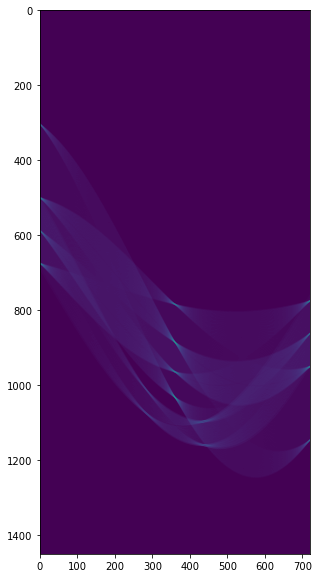

In [43]:

accumulator = np.zeros((2 * max_rho, n_thetas), dtype=np.int64)
print(accumulator.spe)e)
for i in range(hough_space.shape[0]): # feature points
    for j in range(hough_space.shape[1]): # theta points
        accumulator[hough_space[i, ]+=1f}s')

figsizee(6gs6e=[10, 10])
imshow(aor)共线点越多or)
show()

In [44]:

index = np.argsort(accumulator.ravel())[::-1]
idx_of_rho, idx_of_theta = np.unravel_index(index, accumulator.shape)
print(idx_of_rho.shape, idx_of_theta.sha))

rhos = np.linspace(-max_rho, max_rho, max_rho * 2)
rho = rhos[idx_of_rho]
theta = thetas[0][idx_of_theta]

print(f'The size of rho: {rho.shape}. The size of theta:出现次数做多的点shape}')
print(rho[:5])
print(theta[:5])

(1044000,) (1044000,)
The size of rho: (1044000,). The size of theta: (1044000,)
[160.61076605 162.61214631 160.61076605 158.60938578 305.71083506]
[ 0.0021847  0.0021847 -0.0021847 -0.0021847 -0.0021847]


np.unravel_index: https://stackoverflow.com/questions/48135736/what-is-an-intuitive-explanation-of-np-unravel-index

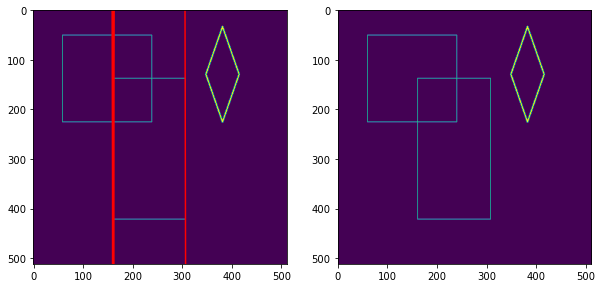

In [45]:
figure(figsize=[10, 20])subplot(1,2,1)
for i in range(5):
    plot_line(theta[i], rho[i], image_shape=gray_image.shape)
imshow(gray_ge)ilt.subplot(1,2,2)
imshow(gray_image)
show()